# Color-based Continuum Subtraction


This notebook is for testing an implementation of color-based continuum subtraction based on the method from Matteo Fossati.

In [45]:
import os
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
%matplotlib inline

In [43]:
os.chdir('/home/rfinn/research/Virgo-dev/cont-sub-gr')
%run ~/github/havirgo/python/subtract_continuum.py VFID0569-NGC5989-INT-20190530-p002

['legacy/VFID0569-legacy-151-r-ha.fits']
g-r image = legacy/VFID0569-legacy-151-gr-ha-smooth.fits
found g-r image.  not remaking this
telescope =  INT VFID0569-NGC5989-INT-20190530-p002

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18


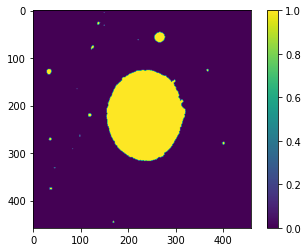

In [27]:
# syntax for usemask was not correct.
# I tried gr_col != np.nan, but this returns all try
# below is the proper way to identify where the nans are
temp = ~np.isnan(gr_col)
plt.imshow(temp)
plt.colorbar()

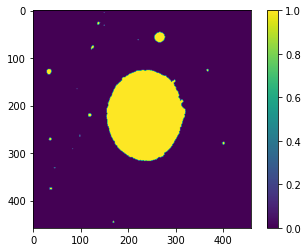

In [24]:
plt.figure()
plt.imshow(usemask)
plt.colorbar()

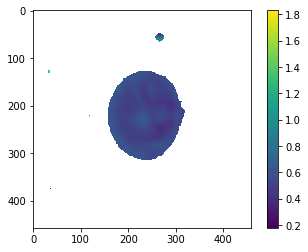

In [26]:
plt.imshow(gr_col)
plt.colorbar()

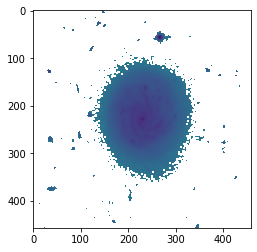

In [28]:
plt.figure()
plt.imshow(mag_r_to_Ha)

In [29]:
np.sum(np.isnan(mag_r_to_Ha))

93670

In [32]:
testtran = filter_transformation(telescope,rfilter, gr_col)
np.sum(np.isnan(testtran))

0

Nans are arising when I convert data_r to mag_r b/c there are negative values in the r-band image (sky is already subtracted).





In [38]:
print("number of nans in mag_r = ",np.sum(np.isnan(mag_r)))
print("number of nans in data_r = ",np.sum(np.isnan(data_r)))
print("number of negs in data_r = ",np.sum(data_r < 0))

number of nans in mag_r =  93670
number of nans in data_r =  0
number of negs in data_r =  93670


I'm going to try to implement an approach where the images are scaled to the same ZP.  The default value is in the r-band image header.

In [40]:
rhdu[0].header['FLTRATIO']

0.03216995298862457

In [48]:
os.chdir('/home/rfinn/research/Virgo-dev/cont-sub-gr')
%run ~/github/havirgo/python/subtract_continuum.py VFID0569-NGC5989-INT-20190530-p002

['legacy/VFID0569-legacy-151-r-ha.fits']
g-r image = legacy/VFID0569-legacy-151-gr-ha-smooth.fits
found g-r image.  not remaking this
telescope =  INT VFID0569-NGC5989-INT-20190530-p002

Generate NET image

Computing median values for r and halpha images
currently, I am not subtracting these, so check values...
Unbinned SB limit 1sigma 0.0 e-18
Smoothing net image
Smoothed 15x15 SB limit 1sigma 0.0 e-18


# Compare 2 versions of CS images

In [49]:
cs1_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-CS.fits'
cs2_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-CS-gr.fits'

cs1 = fits.getdata(cs1_file)
cs2 = fits.getdata(cs2_file)

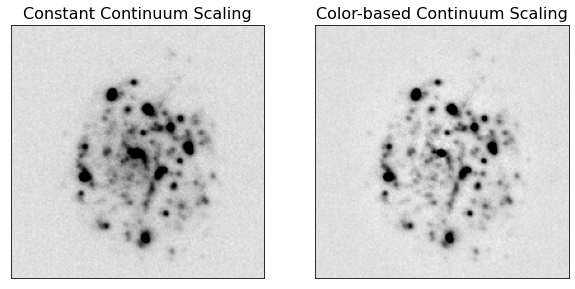

In [76]:
cs1_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-CS.fits'
cs2_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-CS-gr.fits'

cs1 = fits.getdata(cs1_file)
cs2 = fits.getdata(cs2_file)

plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.01)
center = 230
delta = 100
xmin = center - delta
xmax = center + delta
images = [cs1,cs2]
titles = ["Constant Continuum Scaling","Color-based Continuum Scaling"]
for i,cs in enumerate(images):
    plt.subplot(1,2,i+1)
    plt.imshow(cs,vmin=-0.015,vmax=.1,cmap='gray_r')
    plt.title(titles[i],fontsize=16)
    plt.axis([xmin,xmax,xmin,xmax])
    plt.xticks([],[])
    plt.yticks([],[])

plt.savefig('VFID0569-NGC5989-CS-test.png')

In [77]:
os.chdir('/home/rfinn/research/Virgo-dev/cont-sub-gr')
%run ~/github/havirgo/python/get_gr_cont_phot.py VFID0569-NGC5989-INT-20190530-p002

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
testing: colname =  LOG_SFR_HA_FLAG
detect objects


TypeError: __init__() got an unexpected keyword argument 'mask'

<Figure size 640x480 with 0 Axes>

In [92]:
from scipy.stats import scoreatpercentile
from astropy.io import fits
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
from astropy.visualization import SqrtStretch, PercentileInterval
from astropy.visualization import ImageNormalize
from astropy.visualization import LinearStretch,SinhStretch


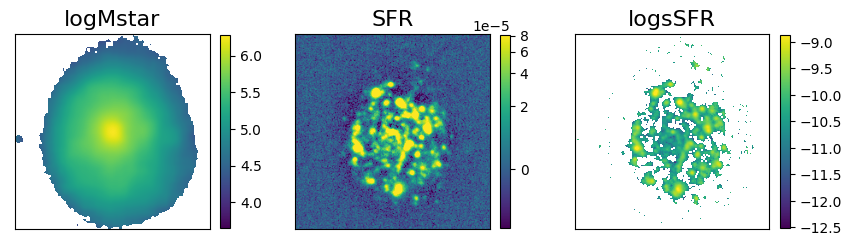

In [105]:
os.chdir('/home/rfinn/research/Virgo-dev/cont-sub-gr')
im1_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-logmstar-vr.fits'
im2_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-sfr-vr.fits'
im3_file = 'VFID0569-NGC5989-INT-20190530-p002/VFID0569-NGC5989-INT-20190530-p002-ssfr.fits'

cs1 = fits.getdata(im1_file)
cs2 = fits.getdata(im2_file)
cs3 = fits.getdata(im3_file)

xsize,ysize = cs1.shape
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3)

center = xsize//2
delta = xsize//4
xmin = center - delta
xmax = center + delta
images = [cs1,cs2,cs3]
titles = ["logMstar","SFR",'logsSFR']
percentile1 = .5
percentile2 = 99.5
stretch=['linear','asinh','linear']
for i,cs in enumerate(images):
    plt.subplot(1,3,i+1)
    norm = simple_norm(cs, stretch=stretch[i],max_percent=percentile2,min_percent=percentile1)

    plt.imshow(cs, norm=norm,origin='lower')#,vmin=v1,vmax=v2)
    #plt.imshow(cs)#,vmin=-0.015,vmax=.1)#,cmap='gray_r')
    plt.colorbar(fraction=.045)
    plt.title(titles[i],fontsize=16)
    plt.axis([xmin,xmax,xmin,xmax])
    plt.xticks([],[])
    plt.yticks([],[])

plt.savefig('VFID0569-NGC5989-mstar-sfr.png')

In [107]:
os.chdir('/home/rfinn/research/Virgo-dev/cont-sub-gr')
from PIL import Image
galdir = 'VFID0569-NGC5989-INT-20190530-p002/'
legacy_jpg = glob.glob(galdir+'legacy/*.jpg')[0]
print("legacy jpg = ",legacy_jpg)
jpeg_data = Image.open(legacy_jpg)

legacy jpg =  VFID0569-NGC5989-INT-20190530-p002/legacy/VFID0569-legacy-151.jpg


In [109]:
jpeg_data.size

(151, 151)

In [111]:
cs.shape

(458, 458)